# People Sentiment Analysis 

## Problem Statement:
>>1) Fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion.
              -Use NLTK library for tokenization and for stopwords..
              
>>2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.    

>>3) Pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A    

In [1]:
# Importing Important Libraries

import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import regexp_tokenize

# Task 1

In [2]:
# A function is defined here in which tweets for ""#coronavirus" from the twitter are being scraped...

import GetOldTweets3 as got
def scrap_tweets(since,until):
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('#CoronaVirus')\
                     .setSince(since)\
                     .setUntil(until)\
                     .setMaxTweets(1000)
    
    tweet=got.manager.TweetManager.getTweets(tweetCriteria)
    
    tweet_text=[[tweet.text]for tweet in tweet]
    return tweet_text

In [3]:
# Tweets before the Corona outbreak in INDIA..
text_tweets_before=scrap_tweets("2020-01-01","2020-01-30")

# Tweets after the Corona outbreak in INDIA
text_tweets_after=scrap_tweets("2020-03-01","2020-04-01")

In [4]:
# Scrapped Tweet data from twitter database before corona outbreak ...
text_tweets_before

[['Señores para qué #coronavirus en Colombia, si aún no hemos podido derrotar el virus llamado uribismo. '],
 [' Resmi açıklamaya göre ölü sayısı 170, vaka sayısı 7711. Vaka sayısı ve ölü sayısı parabolik olarak artıyor. #coronavirus'],
 ['Grants for epilepsy and multiple sclerosis research, what you need to know about #coronavirus and Australia Day honours – this week at @Alfred_Research http://bit.ly/38U4nVj'],
 ['I wonder when everyone will be concerned about the #coronavirus. ___ #PoetsAndRhymers'],
 ['#Update: The number of confirmed cases of novel #coronavirus rose to 7,711 in Chinese mainland as of Jan 29, including 170 deaths '],
 ['Joining many international airlines, @AirCanada suspends all flights to Beijing and Shanghai, with last flights out on January 30th. Safe travels, everyone. #coronavirus '],
 ['Se realiza estudio del genoma ARN del virus que es donde #coronavirus,muto y se aplica descarte del resto de virus conocidos, asumo que el de Guayaquil se logró cultivar en u

In [5]:
# Scrapped Tweet data from twitter database after corona outbreak ...
text_tweets_after

[['#DOJ seeks new emergency powers amid #coronavirus #pandemic - POLITICO'],
 ['#SinImpuestos hasta que tu @GobiernoMX y tu #Prejidente @lopezobrador_ te aseguren estabilidad económica y social @mexico @SATMX #CoronavirusMx #coronavirus #COVID19'],
 ['And suddenly, Trump sorta gets it. "This is not the flu." #Coronavirus'],
 ["He golfed He campaigned He watched tv He partied He tweeted, hundreds of times. But he couldn't pay attention to a deadly virus 100,000 dead Americans The mother fucker should resign #coronavirus #covid19 .@realdonaldtrump"],
 ['#maricánotícias Orientações da Prefeitura de Maricá para as inscrições para o PAT - Programa de Amparo ao Trabalhador que começam nesta quarta-feira, dia 01/04. https://m1newstv.com/comecam-as-inscricoes-para-o-pat-quarta-feira-01-04/ #programadeamparoaotrabalhador #pat #coronavirus #Covid19'],
 ["that's sh*t will trend till #coronavirus is eradicate from the surface of the earth. "],
 ["I'm wondering how did chinese people come through t

In [6]:
# In here basically I have performed Task:1 i.e cleaning data, removing punctuations and performing tokenization operation... 

length_before=len(text_tweets_before)
length_after=len(text_tweets_after)
text_before = ""
text_after = ""

# converting the tweets data(that was in a list and in that list every tweet is in a separate list) into a single string..
for i in range(0,length_before):
    text_before=text_tweets_before[i][0]+ " " + text_before

for j in range(0,length_after):
    text_after=text_tweets_after[j][0]+ " " + text_after

# Converting all the tweets in lowercase...  
lower_case_before = text_before.lower()
lower_case_after = text_after.lower()

# Removing Punctuations...
cleaned_text_before=lower_case_before.translate(str.maketrans('','',string.punctuation))
cleaned_text_after=lower_case_after.translate(str.maketrans('','',string.punctuation))

# Converting tweets data in word tokenize format...
tokenize_words_before=cleaned_text_before.split()
tokenize_words_after=cleaned_text_after.split()

In [7]:
# After removing the punctuations our data(before outbreak) is like....
cleaned_text_before

'as amapresident notes a group of vulnerable australians who through no fault of their own found themselves at the epicentre of a significant outbreak and they must be under a lot of stress and fear and concern coronavirus ncov2019 wuhan china  médicos padecen de ansiedad ante su frustración por no poder ayudar a los miles de pacientes que llenan los hospitales infectados con el mortal coronavirus  guayas  con el fin de socializar las medidas preventivas ante eventual presencia del coronavirus personal del centro de salud y hospital básico playas dieron charlas en áreas de obstetricia pediatría consulta externa y salas de espera corona  coronavirus  todos kilombo por el coronavirus tranquilo na los perros apenas podemos sobrevivir al dengue algunos trajeron sarampión y fiebre amarilla del brasil vamo a calmarno this is a lie canadiangovernment right now legit there are passengers who are sick at pearsonairport the gates to come in coronavirus china screeneveryone canada coronavirus on 

In [8]:
# After removing the punctuations our data(after outbreak) is like....
cleaned_text_after

'birthday coronavirus my birthday in quarantine i can’t imagine doing it without my best friendmy wife  celebritiespaidmybills let’s make this a thing check to check is hard it’s even harder when you can’t work here is how you can help instead of showing us your sweet set up for staying home i’ll submit my bill and you help me serviceindustry iwanttohelp coronavirus tus primeros 700por trabajar con tus redes sociales desde tu casa al horario que tu mismo te pongas  httpsbitly3difil3 1abril eeuu latinos latinoamerica covid19 coronavirus emprende sale setujefe oferta check out the new centers policy series centering on coronavirus which proves insights and analyses of how covid19 is progressing and how it is affecting our economy society and health care system not follow but beware the money trail literally i have the impression now that much of the coronavirus has spread through the exchange of paper money and coins especially think of it oils and moisture applied to absorbant and hard 

In [9]:
# Our Data(before outbreak) after the implementation of word Tokenization technique...
tokenize_words_before

['as',
 'amapresident',
 'notes',
 'a',
 'group',
 'of',
 'vulnerable',
 'australians',
 'who',
 'through',
 'no',
 'fault',
 'of',
 'their',
 'own',
 'found',
 'themselves',
 'at',
 'the',
 'epicentre',
 'of',
 'a',
 'significant',
 'outbreak',
 'and',
 'they',
 'must',
 'be',
 'under',
 'a',
 'lot',
 'of',
 'stress',
 'and',
 'fear',
 'and',
 'concern',
 'coronavirus',
 'ncov2019',
 'wuhan',
 'china',
 'médicos',
 'padecen',
 'de',
 'ansiedad',
 'ante',
 'su',
 'frustración',
 'por',
 'no',
 'poder',
 'ayudar',
 'a',
 'los',
 'miles',
 'de',
 'pacientes',
 'que',
 'llenan',
 'los',
 'hospitales',
 'infectados',
 'con',
 'el',
 'mortal',
 'coronavirus',
 'guayas',
 'con',
 'el',
 'fin',
 'de',
 'socializar',
 'las',
 'medidas',
 'preventivas',
 'ante',
 'eventual',
 'presencia',
 'del',
 'coronavirus',
 'personal',
 'del',
 'centro',
 'de',
 'salud',
 'y',
 'hospital',
 'básico',
 'playas',
 'dieron',
 'charlas',
 'en',
 'áreas',
 'de',
 'obstetricia',
 'pediatría',
 'consulta',
 'ext

In [10]:
# Our Data(after outbreak) after the implementation of word Tokenization technique...
tokenize_words_after

['birthday',
 'coronavirus',
 'my',
 'birthday',
 'in',
 'quarantine',
 'i',
 'can’t',
 'imagine',
 'doing',
 'it',
 'without',
 'my',
 'best',
 'friendmy',
 'wife',
 'celebritiespaidmybills',
 'let’s',
 'make',
 'this',
 'a',
 'thing',
 'check',
 'to',
 'check',
 'is',
 'hard',
 'it’s',
 'even',
 'harder',
 'when',
 'you',
 'can’t',
 'work',
 'here',
 'is',
 'how',
 'you',
 'can',
 'help',
 'instead',
 'of',
 'showing',
 'us',
 'your',
 'sweet',
 'set',
 'up',
 'for',
 'staying',
 'home',
 'i’ll',
 'submit',
 'my',
 'bill',
 'and',
 'you',
 'help',
 'me',
 'serviceindustry',
 'iwanttohelp',
 'coronavirus',
 'tus',
 'primeros',
 '700por',
 'trabajar',
 'con',
 'tus',
 'redes',
 'sociales',
 'desde',
 'tu',
 'casa',
 'al',
 'horario',
 'que',
 'tu',
 'mismo',
 'te',
 'pongas',
 'httpsbitly3difil3',
 '1abril',
 'eeuu',
 'latinos',
 'latinoamerica',
 'covid19',
 'coronavirus',
 'emprende',
 'sale',
 'setujefe',
 'oferta',
 'check',
 'out',
 'the',
 'new',
 'centers',
 'policy',
 'series',

In [11]:
# Stop Words that are used in this script...
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","also",'i', 'me', 'my', 'myself', 
              'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
              'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
              'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
              "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
              'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
              'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
              "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
              "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","would","could","mr","ms"]

# Data after it is filtered using Stop Words...
final_words_before=[word_before for word_before in tokenize_words_before if word_before not in stop_words]
final_words_after=[word_after for word_after in tokenize_words_after if word_after not in stop_words]

In [12]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words_before = [] 
lemma_words_after = []
final_words=[final_words_before,final_words_after]
for i in final_words:
    for word in i:
        word = WordNetLemmatizer().lemmatize(word)
        if i==final_words_before:
            lemma_words_before.append(word)
        if i==final_words_after:
            lemma_words_after.append(word)

In [13]:
# Data(before outbreak) after the Lemmatization technique is applied...
lemma_words_before

['amapresident',
 'note',
 'group',
 'vulnerable',
 'australian',
 'fault',
 'found',
 'epicentre',
 'significant',
 'outbreak',
 'must',
 'lot',
 'stress',
 'fear',
 'concern',
 'coronavirus',
 'ncov2019',
 'wuhan',
 'china',
 'médicos',
 'padecen',
 'de',
 'ansiedad',
 'ante',
 'su',
 'frustración',
 'por',
 'poder',
 'ayudar',
 'los',
 'mile',
 'de',
 'pacientes',
 'que',
 'llenan',
 'los',
 'hospitales',
 'infectados',
 'con',
 'el',
 'mortal',
 'coronavirus',
 'guayas',
 'con',
 'el',
 'fin',
 'de',
 'socializar',
 'la',
 'medidas',
 'preventivas',
 'ante',
 'eventual',
 'presencia',
 'del',
 'coronavirus',
 'personal',
 'del',
 'centro',
 'de',
 'salud',
 'hospital',
 'básico',
 'playas',
 'dieron',
 'charlas',
 'en',
 'áreas',
 'de',
 'obstetricia',
 'pediatría',
 'consulta',
 'externa',
 'salas',
 'de',
 'espera',
 'corona',
 'coronavirus',
 'todos',
 'kilombo',
 'por',
 'el',
 'coronavirus',
 'tranquilo',
 'na',
 'los',
 'perros',
 'apenas',
 'podemos',
 'sobrevivir',
 'al',
 

In [14]:
# Data(after outbreak) after the Lemmatization technique is applied...
lemma_words_after

['birthday',
 'coronavirus',
 'birthday',
 'quarantine',
 'can’t',
 'imagine',
 'without',
 'best',
 'friendmy',
 'wife',
 'celebritiespaidmybills',
 'let’s',
 'make',
 'thing',
 'check',
 'check',
 'hard',
 'it’s',
 'even',
 'harder',
 'can’t',
 'work',
 'help',
 'instead',
 'showing',
 'u',
 'sweet',
 'set',
 'staying',
 'home',
 'i’ll',
 'submit',
 'bill',
 'help',
 'serviceindustry',
 'iwanttohelp',
 'coronavirus',
 'tus',
 'primeros',
 '700por',
 'trabajar',
 'con',
 'tus',
 'redes',
 'sociales',
 'desde',
 'tu',
 'casa',
 'al',
 'horario',
 'que',
 'tu',
 'mismo',
 'te',
 'pongas',
 'httpsbitly3difil3',
 '1abril',
 'eeuu',
 'latino',
 'latinoamerica',
 'covid19',
 'coronavirus',
 'emprende',
 'sale',
 'setujefe',
 'oferta',
 'check',
 'new',
 'center',
 'policy',
 'series',
 'centering',
 'coronavirus',
 'prof',
 'insight',
 'analysis',
 'covid19',
 'progressing',
 'affecting',
 'economy',
 'society',
 'health',
 'care',
 'system',
 'follow',
 'beware',
 'money',
 'trail',
 'lite

# Task 2

In [15]:
# Here emotions.txt file is updated according to the dat obtained after the Lemmatization technique and 
#    a for loop is made in order to print the People emotions and emotion counter in one go...

emotion_before = []
emotion_after = []
lemma_words=[lemma_words_before,lemma_words_after]

with open('NLP/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        for i in lemma_words:
            if word in i:
                if i==lemma_words[0]:
                    emotion_before.append(emotion)
                if i==lemma_words[1]:
                    emotion_after.append(emotion)

# People Emotions before the outbreak...
print("People emotions before the outbreak \n", emotion_before, '\n \n')

# People Emotions after the outbreak...
print("People emotions after the outbreak \n", emotion_after, '\n \n')

# Emotion counter for the people sentiments before the outbreak...
count_before = Counter(emotion_before)

# Emotion counter for the people sentiments after the outbreak...
count_after = Counter(emotion_after)

# Printing the values...
print("Count of each emotion before outbreak \n", count_before,'\n \n')
print("Count of each emotion after outbreak \n", count_after)

People emotions before the outbreak 
 [' attracted', ' fearful', ' angry', ' surprise', ' sad', ' safe', ' adequate', ' average', ' attracted', ' surprise', ' powerless', ' sad', ' fearful', ' angry', ' sad', ' hated', ' cheated', ' fearful', ' powerless', ' free', ' fearful', ' angry', ' happy', ' sad', ' happy', ' entitled', ' alone', ' sad', ' happy', ' angry', ' attracted', ' fearful', ' adequate', 'fearful', ' powerless', ' alone', ' free', ' adequate', ' sad', ' surprise', ' esteemed', ' surprise', ' anxious', ' fearful', ' entitled', ' attached', ' belittled', ' powerless', ' powerless', ' fearful', ' loved', ' fearful', ' alone', ' embarrassed', ' average', ' focused', ' angry', ' happy', ' sad', ' hated', ' angry', ' fearful', ' entitled', ' anxious', ' angry', ' happy', ' fearful', ' angry', ' sad', ' fearful', ' sad', ' alone', ' angry', ' alone', ' sad', ' sad', ' sad', ' sad', ' sad'] 
 

People emotions after the outbreak 
 [' attracted', ' esteemed', ' powerless', ' sad'

In [16]:
# Defining a function which will judge the People Sentiment on the basis of the Emotions Score...

def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print("Emotions Score: ",score)
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******\n")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******\n")
    else:
        print("Neutral Sentiment")

Emotions Score:  {'neg': 0.087, 'neu': 0.849, 'pos': 0.064, 'compound': -1.0}

     ******Negative Sentiment*******



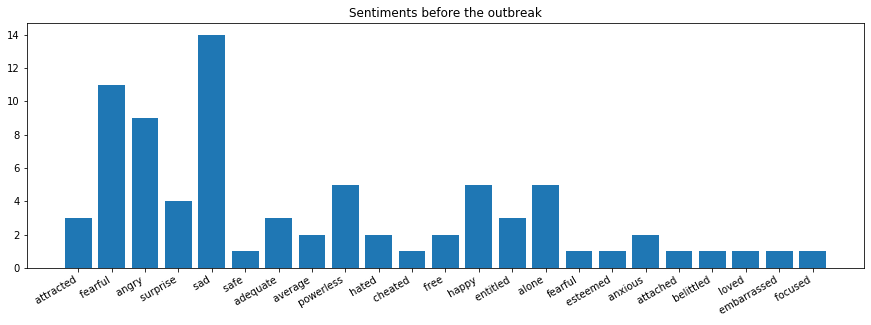

In [17]:
# Here calling that Sentiment Analyzer function for checking people emotions before the outbreak...
sentiment_analyse(cleaned_text_before)

# Displaying people emotions in the form of a bar graph...
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.bar(count_before.keys(), count_before.values())
fig.autofmt_xdate()
plt.savefig('graph_before.png')
plt.title("Sentiments before the outbreak")
plt.show()

Emotions Score:  {'neg': 0.092, 'neu': 0.819, 'pos': 0.089, 'compound': -0.9992}

     ******Negative Sentiment*******



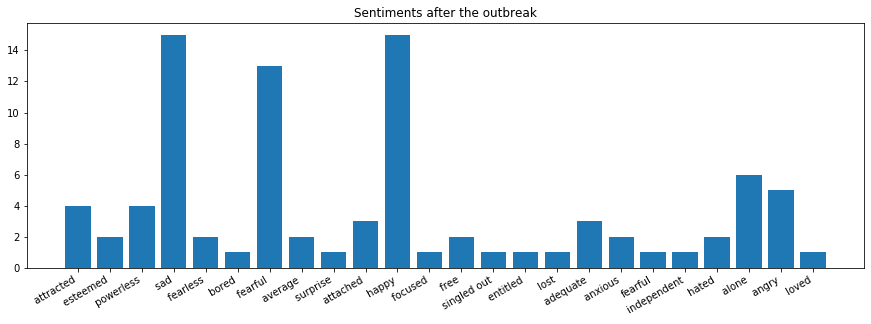

In [18]:
# Here calling that Sentiment Analyzer function for checking people emotions after the outbreak...
sentiment_analyse(cleaned_text_after)

# Displaying people emotions in the form of a bar graph...
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.bar(count_after.keys(), count_after.values())
fig.autofmt_xdate()
plt.savefig('graph_after.png')
plt.title("Sentiments after the outbreak")
plt.show()

## Sentiments Conclusion from the above graphs:         

1) People are more negative after the outbreak as compared to how they are before they outbreak.                     
2) People are sad as due to the corona all  people are suffering.        
3) People are happy after the corona outbreak as they are spending quality time with the family during the lockdown period.  
4) Level of fearfulness is increased.            
5) Anger level of people increased after the coroona outbreak.                 
6) After the outbreak people feels more bore at home.        

# Task 3

In [19]:
# Using Count Vectorizer in order to find the Bag Of Words...

from sklearn.feature_extraction.text import CountVectorizer
document1=[cleaned_text_before]
document2=[cleaned_text_after]
cv=CountVectorizer()

# for loop in order to perform count vectorizer technique for different numbers of documents..
for i,j in enumerate([document1,document2]):
    cv.fit_transform(j)
    if i==0:
        k='before'
    else:
        k='after'
    print(f"Bag of Words {k} Outbreak:\n",cv.get_feature_names())
    print(f"Original Indices {k} Outbreak:\n",cv.vocabulary_)

Bag of Words before Outbreak:
 ['000', '004', '004030012020', '01252020', '0541', '0635น', '08101', '10', '100', '1000', '1032', '106', '10daysyoure', '1122', '115', '12', '12000', '12167', '122', '1220', '124', '125', '128', '129', '1292020', '13', '132', '13th', '14', '1439', '15', '155', '1554', '1589', '16', '160', '162', '164', '169', '17', '170', '1700', '1726', '1732', '1737', '177', '18', '1800', '18337844397', '186', '19', '195', '19h30', '1a', '1n', '1st', '1月10日到1月20日这十天究竟发生了什么', '20', '200', '2000', '20022003', '2003', '2012', '2014', '2015', '20172018', '2018', '2019', '2019ncov', '2020', '2020ncov', '2020年1月29日湖北省新型冠状病毒感染的肺炎疫情情况', '2021', '21', '210', '219', '22', '220', '23', '235', '24', '243', '247', '2478', '24hrs', '2563', '26', '2600', '2679', '2700', '28', '280', '28th', '29', '290120', '29012020', '2912020', '29ene', '2s', '2ªb', '2대로', '30', '3001', '30010050', '30012020', '3012', '30th', '31', '31012020', '33', '34', '34000', '3554', '37', '38歲的武漢大學中南醫院急救護士郭琴連續多

In [20]:
# In here I am showing Bag Of Words for both the documents using a DataFrame...
index=['BOW_tweets_BEFORE','BOW_tweets_AFTER']
document=[cleaned_text_before,cleaned_text_after]
array_doc = cv.fit_transform(document)
df=pd.DataFrame(array_doc.toarray(),columns=cv.get_feature_names(),index=index)
print("Showing how words are store on Bag Of Words:")
df.iloc[:,3000:3020]

Showing how words are store on Bag Of Words:


,daniel,danielandrewsmp,danielarago4,danielsarcos,danno,dans,danticiper,dapatakan,daproject2,dar,daran,darauf,darbuka,dareaust,dari,darle,dará,darán,das,dash
BOW_tweets_BEFORE,0,0,0,0,1,4,1,1,0,1,1,1,0,0,2,1,1,0,8,0
BOW_tweets_AFTER,1,2,1,1,0,4,0,0,1,1,0,0,1,4,0,0,1,1,1,1


In [21]:
# Code to show the number of words that are present in document2 and also present in document1...
common_words=[]
for j,i in enumerate(df):        
    if (df.iloc[1,j]!=0 and df.iloc[0,j]!=0):
        df.iloc[1,j]>=df.iloc[0,j] or df.iloc[1,j]==df.iloc[0,j]
        common_words.append(i)        
print("Number of Words which are present in BOW of Document 2 and are also present in BOW of Document 1: ",len(common_words))
print("\n\nWords which are present in BOW of Document 2 and are also present in BOW of Document 1:\n\n",common_words)

Number of Words which are present in BOW of Document 2 and are also present in BOW of Document 1:  2005


Words which are present in BOW of Document 2 and are also present in BOW of Document 1:

 ['000', '10', '100', '1000', '106', '12', '12000', '13', '14', '15', '16', '17', '18', '19', '195', '1n', '1st', '20', '2000', '2018', '2019', '2020', '21', '22', '23', '24', '247', '26', '28', '29', '30', '31', '33', '34', '40', '4000', '4pm', '50', '500', '5000', '52', '5pm', '600', '61000', '70', '80', '800', '99', 'abc', 'able', 'about', 'above', 'absolutely', 'acabo', 'accepting', 'access', 'according', 'accurate', 'act', 'action', 'actual', 'actualización', 'actually', 'acuerdo', 'additional', 'adhanom', 'adoptadas', 'advantage', 'advice', 'afectados', 'affairs', 'affected', 'affecting', 'afp', 'afraid', 'after', 'afternoon', 'again', 'against', 'age', 'aglomerações', 'ago', 'agora', 'ahead', 'ahora', 'ai', 'ainda', 'air', 'airborne', 'aircanada', 'airport', 'al', 'alert', 'alerta', 'ale

# Conclusion:

1) People are more negative after the outbreak as compared to how they are before they outbreak.            
2) People are sad as due to the corona all people are suffering.    
3) People are happy after the corona outbreak as they are spending quality time with the family during the lockdown period.   
4) Level of fearfulness is increased.      
5) Anger level of people increased after the coroona outbreak.               
6) After the outbreak people feels more bore at home.                 
7) Number of words which are present in Document2 and are also in Document 1 are:     